In [1]:
import mlflow
import os


mlflow.set_tracking_uri('http://localhost:5000')
oputna_dir = '../../optuna'

/home/gianfranco/Desktop/uni/price-oracle/venv/lib/python3.9/site-packages/pydantic/_internal/_fields.py:128: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/gianfranco/Desktop/uni/price-oracle/venv/lib/python3.9/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


### Train Model on single cripto

#### Train Baseline Model

In [ ]:
mlflow.set_experiment('Training BASELINE')

In [ ]:
from common import get_dataframe, register_training_experiment

import pandas as pd

df = get_dataframe()

for coin in df.columns[1:]:
    df_coin = pd.DataFrame({'Date': df['Date'], coin: df[coin]})
    df_coin['lag1'] = df_coin[coin].shift(1)
    df_coin.dropna(inplace=True)
    
    register_training_experiment(
        data=df_coin[coin],
        predictions=df_coin['lag1'],
        model_name="BASELINE",
        coin=coin,
        x_axis=df_coin['Date'])

#### Train LSTM / RNN Model

In [3]:
mlflow.set_experiment('Training_LSTM_RNN')
storage_name = f"sqlite:///{os.path.join(oputna_dir, 'training.db')}"

2023/11/03 21:47:36 INFO mlflow.tracking.fluent: Experiment with name 'Training_LSTM_RNN' does not exist. Creating a new experiment.


2023-11-03 21:48:14.042577: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-03 21:48:14.045580: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 21:48:14.075962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 21:48:14.075989: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 21:48:14.076011: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

9/9 [==============================] - 0s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error_keras: 217.1690


[I 2023-11-03 21:48:41,905] Trial 0 finished with value: 217.1690216064453 and parameters: {'num_layers': 3, 'units_layer_0': 32, 'units_layer_1': 32, 'units_layer_2': 16, 'sequence_length': 3, 'learning_rate': 0.00010303873594008098, 'dropout_rate': 0.1527720558572146, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.34206407354391294, 'batch_size': 32}. Best is trial 0 with value: 217.1690216064453.
2023/11/03 21:48:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 0.0455 - mean_absolute_percentage_error_keras: 86.7982


[I 2023-11-03 21:48:57,869] Trial 1 finished with value: 86.79823303222656 and parameters: {'num_layers': 3, 'units_layer_0': 16, 'units_layer_1': 32, 'units_layer_2': 24, 'sequence_length': 1, 'learning_rate': 0.00025005212791430335, 'dropout_rate': 0.3629106375520574, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.11057376850468453, 'batch_size': 24}. Best is trial 1 with value: 86.79823303222656.
2023/11/03 21:48:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 4.7549e-04 - mean_absolute_percentage_error_keras: 24.7919


[I 2023-11-03 21:49:27,990] Trial 2 finished with value: 24.791906356811523 and parameters: {'num_layers': 3, 'units_layer_0': 8, 'units_layer_1': 16, 'units_layer_2': 16, 'sequence_length': 1, 'learning_rate': 0.0001278557479092623, 'dropout_rate': 0.18787761658038432, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.18510832272690358, 'batch_size': 8}. Best is trial 2 with value: 24.791906356811523.
2023/11/03 21:49:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 6ms/step - loss: 0.0265 - mean_absolute_percentage_error_keras: 217.6953


[I 2023-11-03 21:50:22,031] Trial 3 finished with value: 217.69534301757812 and parameters: {'num_layers': 4, 'units_layer_0': 16, 'units_layer_1': 32, 'units_layer_2': 16, 'units_layer_3': 8, 'sequence_length': 5, 'learning_rate': 0.00029866247923656454, 'dropout_rate': 0.4308565530548281, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.26362886538726765, 'batch_size': 16}. Best is trial 2 with value: 24.791906356811523.
2023/11/03 21:50:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.5939e-04 - mean_absolute_percentage_error_keras: 9.3751


[I 2023-11-03 21:50:47,557] Trial 4 finished with value: 9.375086784362793 and parameters: {'num_layers': 2, 'units_layer_0': 8, 'units_layer_1': 8, 'sequence_length': 1, 'learning_rate': 0.0008403335462607499, 'dropout_rate': 0.24271572572769057, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.1546332113683348, 'batch_size': 16}. Best is trial 4 with value: 9.375086784362793.
2023/11/03 21:50:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_percentage_error_keras: 47.4960


[I 2023-11-03 21:51:01,937] Trial 5 finished with value: 47.49601364135742 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 3, 'learning_rate': 0.0008665787138125963, 'dropout_rate': 0.07624063024989963, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.10389431643245495, 'batch_size': 16}. Best is trial 4 with value: 9.375086784362793.
2023/11/03 21:51:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 2.5927e-04 - mean_absolute_percentage_error_keras: 12.3349


[I 2023-11-03 21:51:14,208] Trial 6 finished with value: 12.334879875183105 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.0006535894808520919, 'dropout_rate': 0.02984653318541186, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'sigmoid', 'weight_decay': 0.3402834092648243, 'batch_size': 16}. Best is trial 4 with value: 9.375086784362793.
2023/11/03 21:51:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:51:23,565] Trial 7 pruned. 
2023/11/03 21:51:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 1s 4ms/step - loss: 2.3377e-04 - mean_absolute_percentage_error_keras: 9.2078


[I 2023-11-03 21:52:12,582] Trial 8 finished with value: 9.20775318145752 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0007659871810929899, 'dropout_rate': 0.09705429624535922, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.33549882872042064, 'batch_size': 8}. Best is trial 8 with value: 9.20775318145752.
2023/11/03 21:52:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 3.1464e-04 - mean_absolute_percentage_error_keras: 12.2694


[I 2023-11-03 21:52:44,813] Trial 9 finished with value: 12.26939868927002 and parameters: {'num_layers': 3, 'units_layer_0': 16, 'units_layer_1': 24, 'units_layer_2': 24, 'sequence_length': 4, 'learning_rate': 0.0007930281133982475, 'dropout_rate': 0.21787525278575975, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.17862880129474923, 'batch_size': 16}. Best is trial 8 with value: 9.20775318145752.
2023/11/03 21:52:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.4507e-04 - mean_absolute_percentage_error_keras: 6.1935


[I 2023-11-03 21:53:08,847] Trial 10 finished with value: 6.193495273590088 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.0009690073583549443, 'dropout_rate': 0.00545337869479956, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.48230023416936735, 'batch_size': 8}. Best is trial 10 with value: 6.193495273590088.
2023/11/03 21:53:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.8044e-04 - mean_absolute_percentage_error_keras: 5.1016


[I 2023-11-03 21:53:35,824] Trial 11 finished with value: 5.101628303527832 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.000983276597883252, 'dropout_rate': 0.0006309786181418701, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.48668978831144377, 'batch_size': 8}. Best is trial 11 with value: 5.101628303527832.
2023/11/03 21:53:35 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 5.0369e-04 - mean_absolute_percentage_error_keras: 4.6800


[I 2023-11-03 21:53:58,683] Trial 12 finished with value: 4.6799798011779785 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.0008528267549251799, 'dropout_rate': 0.006637365944026644, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4859963448848198, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:53:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.9170e-04 - mean_absolute_percentage_error_keras: 4.9159


[I 2023-11-03 21:54:23,567] Trial 13 finished with value: 4.915945053100586 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 16, 'sequence_length': 2, 'learning_rate': 0.0009753749379588229, 'dropout_rate': 0.001975345573201709, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.49483389565735386, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:54:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:54:29,835] Trial 14 pruned. 
2023/11/03 21:54:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:54:

9/9 [==============================] - 0s 5ms/step - loss: 7.4263e-04 - mean_absolute_percentage_error_keras: 6.2670


[I 2023-11-03 21:55:01,990] Trial 16 finished with value: 6.2670063972473145 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 24, 'sequence_length': 4, 'learning_rate': 0.000702264742049995, 'dropout_rate': 0.06387382419938012, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.42308830945878595, 'batch_size': 32}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:55:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:55:09,626] Trial 17 pruned. 
2023/11/03 21:55:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_absolute_percentage_error_keras: 13.8801


[I 2023-11-03 21:55:33,406] Trial 18 finished with value: 13.880142211914062 and parameters: {'num_layers': 3, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 8, 'sequence_length': 4, 'learning_rate': 0.0007243594278795812, 'dropout_rate': 0.05435759175771239, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.48704968715792274, 'batch_size': 24}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:55:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 9.9178e-04 - mean_absolute_percentage_error_keras: 11.0615


[I 2023-11-03 21:55:50,551] Trial 19 finished with value: 11.061469078063965 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.0009060324001728489, 'dropout_rate': 0.11936663067145875, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3933764627524241, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:55:50 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 0.0010 - mean_absolute_percentage_error_keras: 9.8124


[I 2023-11-03 21:56:25,042] Trial 20 finished with value: 9.812382698059082 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 24, 'sequence_length': 3, 'learning_rate': 0.0005578875779254527, 'dropout_rate': 0.04526270031081821, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3730004836535761, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:56:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.3299e-04 - mean_absolute_percentage_error_keras: 7.8589


[I 2023-11-03 21:56:48,919] Trial 21 finished with value: 7.858917236328125 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.0009896539871682437, 'dropout_rate': 0.01006881310234977, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.48076192240058985, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:56:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.7476e-04 - mean_absolute_percentage_error_keras: 5.4391


[I 2023-11-03 21:57:13,049] Trial 22 finished with value: 5.439109802246094 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.0008248821324356462, 'dropout_rate': 0.0006002488078701729, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.49933679314508733, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:57:13 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:57:20,079] Trial 23 pruned. 
2023/11/03 21:57:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:57:

9/9 [==============================] - 0s 4ms/step - loss: 8.1766e-04 - mean_absolute_percentage_error_keras: 6.1822


[I 2023-11-03 21:58:44,079] Trial 29 finished with value: 6.18217134475708 and parameters: {'num_layers': 4, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 32, 'units_layer_3': 32, 'sequence_length': 3, 'learning_rate': 0.0009351688581654643, 'dropout_rate': 0.15613373569313793, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.2943802364872582, 'batch_size': 32}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:58:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 6.2604e-04 - mean_absolute_percentage_error_keras: 7.6035


[I 2023-11-03 21:59:06,054] Trial 30 finished with value: 7.603538513183594 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 2, 'learning_rate': 0.0007361969198281577, 'dropout_rate': 0.091816187885472, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4625895662557156, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:59:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 7ms/step - loss: 6.9141e-04 - mean_absolute_percentage_error_keras: 7.7271


[I 2023-11-03 21:59:31,809] Trial 31 finished with value: 7.727141380310059 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.000866368620143531, 'dropout_rate': 0.007270893810330315, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.48792956058982395, 'batch_size': 8}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 21:59:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:59:39,146] Trial 32 pruned. 
2023/11/03 21:59:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 21:59:45

9/9 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_percentage_error_keras: 8.4529


[I 2023-11-03 22:01:16,254] Trial 41 finished with value: 8.452865600585938 and parameters: {'num_layers': 4, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 32, 'units_layer_3': 32, 'sequence_length': 4, 'learning_rate': 0.0009427270055265208, 'dropout_rate': 0.15066899414724916, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.2423223654662242, 'batch_size': 32}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 22:01:16 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_absolute_percentage_error_keras: 12.4757


[I 2023-11-03 22:01:44,050] Trial 42 finished with value: 12.475720405578613 and parameters: {'num_layers': 4, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 32, 'units_layer_3': 24, 'sequence_length': 3, 'learning_rate': 0.0009468109852508598, 'dropout_rate': 0.027968828308548126, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.29105991499556444, 'batch_size': 32}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 22:01:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 7.7225e-04 - mean_absolute_percentage_error_keras: 8.1224


[I 2023-11-03 22:02:12,360] Trial 43 finished with value: 8.122414588928223 and parameters: {'num_layers': 4, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 24, 'units_layer_3': 16, 'sequence_length': 2, 'learning_rate': 0.0007863178431426704, 'dropout_rate': 0.18456758797744746, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.3476545287206065, 'batch_size': 24}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 22:02:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_absolute_percentage_error_keras: 13.0020


[I 2023-11-03 22:02:36,474] Trial 44 finished with value: 13.00195026397705 and parameters: {'num_layers': 3, 'units_layer_0': 32, 'units_layer_1': 32, 'units_layer_2': 32, 'sequence_length': 3, 'learning_rate': 0.0008998485928321622, 'dropout_rate': 0.057694111739061034, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.47091281422567055, 'batch_size': 32}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 22:02:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.6882e-04 - mean_absolute_percentage_error_keras: 5.1881


[I 2023-11-03 22:02:47,687] Trial 45 finished with value: 5.188094139099121 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 16, 'sequence_length': 2, 'learning_rate': 0.0008349329801747608, 'dropout_rate': 0.10786638957703282, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4397762630025838, 'batch_size': 24}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 22:02:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 5.5434e-04 - mean_absolute_percentage_error_keras: 6.1488


[I 2023-11-03 22:03:02,374] Trial 46 finished with value: 6.14880895614624 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.0008298529991746324, 'dropout_rate': 0.028458675751134213, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.4415274663277778, 'batch_size': 24}. Best is trial 12 with value: 4.6799798011779785.
2023/11/03 22:03:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:03:07,574] Trial 47 pruned. 
2023/11/03 22:03:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.2276e-04 - mean_absolute_percentage_error_keras: 4.5516


[I 2023-11-03 22:03:18,863] Trial 48 finished with value: 4.551638126373291 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.0007095686930986268, 'dropout_rate': 0.11404448135064446, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4731295279848326, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:03:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.1612e-04 - mean_absolute_percentage_error_keras: 4.7439


[I 2023-11-03 22:03:34,561] Trial 49 finished with value: 4.743913173675537 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 16, 'sequence_length': 5, 'learning_rate': 0.0007254191996695548, 'dropout_rate': 0.10475170102945923, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4101407744404576, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:03:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 8.5342e-04 - mean_absolute_percentage_error_keras: 8.4901


[I 2023-11-03 22:03:49,031] Trial 50 finished with value: 8.490063667297363 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 8, 'sequence_length': 5, 'learning_rate': 0.0007064771074913639, 'dropout_rate': 0.21118425289838794, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.40680121049350115, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:03:49 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.8064e-04 - mean_absolute_percentage_error_keras: 4.6102


[I 2023-11-03 22:03:59,438] Trial 51 finished with value: 4.610177516937256 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 16, 'sequence_length': 2, 'learning_rate': 0.0007612772614383533, 'dropout_rate': 0.1085271723218541, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4358931073498985, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:03:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.1683e-04 - mean_absolute_percentage_error_keras: 7.0393


[I 2023-11-03 22:04:15,325] Trial 52 finished with value: 7.039279937744141 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 16, 'sequence_length': 5, 'learning_rate': 0.0006840185045381698, 'dropout_rate': 0.11120023484172391, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.470446448215015, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:04:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.5579e-04 - mean_absolute_percentage_error_keras: 5.7165


[I 2023-11-03 22:04:27,330] Trial 53 finished with value: 5.7165374755859375 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 16, 'sequence_length': 2, 'learning_rate': 0.0006257051417109294, 'dropout_rate': 0.13391152237645498, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4224309662035309, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:04:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 4.8984e-04 - mean_absolute_percentage_error_keras: 5.7078


[I 2023-11-03 22:04:42,829] Trial 54 finished with value: 5.707765102386475 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 16, 'sequence_length': 4, 'learning_rate': 0.0007486460811035213, 'dropout_rate': 0.07939123466753338, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4775110377514075, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:04:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.4660e-04 - mean_absolute_percentage_error_keras: 4.8601


[I 2023-11-03 22:04:54,576] Trial 55 finished with value: 4.860111713409424 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0007718698692500352, 'dropout_rate': 0.05153313248715075, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.43834275707317605, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:04:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.6329e-04 - mean_absolute_percentage_error_keras: 6.8132


[I 2023-11-03 22:05:05,057] Trial 56 finished with value: 6.813192367553711 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 1, 'learning_rate': 0.0007809980078895238, 'dropout_rate': 0.051220950392416295, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.43877264346200723, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:05:05 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 5.0723e-04 - mean_absolute_percentage_error_keras: 5.7999


[I 2023-11-03 22:05:19,284] Trial 57 finished with value: 5.799903392791748 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 3, 'learning_rate': 0.0007296195833005691, 'dropout_rate': 0.06839801498922964, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4127015787575913, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:05:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.7100e-04 - mean_absolute_percentage_error_keras: 5.2040


[I 2023-11-03 22:05:30,414] Trial 58 finished with value: 5.204043388366699 and parameters: {'num_layers': 1, 'units_layer_0': 8, 'sequence_length': 5, 'learning_rate': 0.0006670412453870651, 'dropout_rate': 0.020419310357764123, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.38941925738457495, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:05:30 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.4769e-04 - mean_absolute_percentage_error_keras: 6.6080


[I 2023-11-03 22:05:44,164] Trial 59 finished with value: 6.607999801635742 and parameters: {'num_layers': 3, 'units_layer_0': 16, 'units_layer_1': 32, 'units_layer_2': 16, 'sequence_length': 2, 'learning_rate': 0.0006982128465045597, 'dropout_rate': 0.10203576676369897, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4572680194965818, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:05:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.7930e-04 - mean_absolute_percentage_error_keras: 4.6200


[I 2023-11-03 22:05:57,330] Trial 60 finished with value: 4.6200432777404785 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.00078469935754681, 'dropout_rate': 0.04890706249419424, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4775058690647182, 'batch_size': 24}. Best is trial 48 with value: 4.551638126373291.
2023/11/03 22:05:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.1282e-04 - mean_absolute_percentage_error_keras: 4.3212


[I 2023-11-03 22:06:08,595] Trial 61 finished with value: 4.321220397949219 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0007780132822979068, 'dropout_rate': 0.04874796375808818, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4770081487426872, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:06:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 5.2452e-04 - mean_absolute_percentage_error_keras: 6.4414


[I 2023-11-03 22:06:28,063] Trial 62 finished with value: 6.441410541534424 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0007903876889457119, 'dropout_rate': 0.0489380411441091, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.43169821285359705, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:06:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.7346e-04 - mean_absolute_percentage_error_keras: 5.0904


[I 2023-11-03 22:06:43,677] Trial 63 finished with value: 5.090417861938477 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0007212367604009805, 'dropout_rate': 0.0941155968327454, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4772531552394958, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:06:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.6813e-04 - mean_absolute_percentage_error_keras: 5.6107


[I 2023-11-03 22:06:55,305] Trial 64 finished with value: 5.610654354095459 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.000748753413802337, 'dropout_rate': 0.0689515503121597, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4503801424813499, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:06:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 6.4359e-04 - mean_absolute_percentage_error_keras: 6.6031


[I 2023-11-03 22:07:08,967] Trial 65 finished with value: 6.603135108947754 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0007988794363759679, 'dropout_rate': 0.11268132129985656, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4818527239047447, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:07:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 6.5306e-04 - mean_absolute_percentage_error_keras: 7.9293


[I 2023-11-03 22:07:21,241] Trial 66 finished with value: 7.929329872131348 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0006426146340771313, 'dropout_rate': 0.04370248408915282, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.42860126059383064, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:07:21 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 5.0055e-04 - mean_absolute_percentage_error_keras: 6.4071


[I 2023-11-03 22:07:33,625] Trial 67 finished with value: 6.407116889953613 and parameters: {'num_layers': 2, 'units_layer_0': 8, 'units_layer_1': 32, 'sequence_length': 1, 'learning_rate': 0.0005873863739427865, 'dropout_rate': 0.14200958444024114, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4025530560010034, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:07:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.4207e-04 - mean_absolute_percentage_error_keras: 4.9773


[I 2023-11-03 22:07:47,019] Trial 68 finished with value: 4.977308750152588 and parameters: {'num_layers': 2, 'units_layer_0': 16, 'units_layer_1': 24, 'sequence_length': 3, 'learning_rate': 0.0007691421390878274, 'dropout_rate': 0.018238787189531938, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.46329544791233995, 'batch_size': 24}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:07:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.8458e-04 - mean_absolute_percentage_error_keras: 4.6008


[I 2023-11-03 22:07:54,504] Trial 69 finished with value: 4.600836753845215 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0006852471361798114, 'dropout_rate': 0.08628369924462062, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.44670881454519346, 'batch_size': 32}. Best is trial 61 with value: 4.321220397949219.
2023/11/03 22:07:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 4.2748e-04 - mean_absolute_percentage_error_keras: 4.3076


[I 2023-11-03 22:08:04,205] Trial 70 finished with value: 4.3076324462890625 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0006963698773945471, 'dropout_rate': 0.12461088887986778, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.382668141084445, 'batch_size': 32}. Best is trial 70 with value: 4.3076324462890625.
2023/11/03 22:08:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.4155e-04 - mean_absolute_percentage_error_keras: 4.4722


[I 2023-11-03 22:08:13,578] Trial 71 finished with value: 4.472175598144531 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0007026804307065817, 'dropout_rate': 0.12438008541892044, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.380786459451623, 'batch_size': 32}. Best is trial 70 with value: 4.3076324462890625.
2023/11/03 22:08:13 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 4.0598e-04 - mean_absolute_percentage_error_keras: 4.1799


[I 2023-11-03 22:08:24,117] Trial 72 finished with value: 4.179872989654541 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0006903499617160078, 'dropout_rate': 0.1242438743676648, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.38342631148887363, 'batch_size': 32}. Best is trial 72 with value: 4.179872989654541.
2023/11/03 22:08:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:08:26,574] Trial 73 pruned. 
2023/11/03 22:08:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:08:29,725] Trial 74 pruned.

9/9 [==============================] - 0s 2ms/step - loss: 5.8394e-04 - mean_absolute_percentage_error_keras: 5.2841


[I 2023-11-03 22:08:39,234] Trial 75 finished with value: 5.284097671508789 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0005997816184918499, 'dropout_rate': 0.08655406362026605, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4007134990559893, 'batch_size': 32}. Best is trial 72 with value: 4.179872989654541.
2023/11/03 22:08:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:08:43,381] Trial 76 pruned. 
2023/11/03 22:08:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:08:46,373] Trial 77 pruned.

9/9 [==============================] - 0s 1ms/step - loss: 4.5119e-04 - mean_absolute_percentage_error_keras: 4.4955


[I 2023-11-03 22:08:57,534] Trial 79 finished with value: 4.4955010414123535 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0007430087576641733, 'dropout_rate': 0.0931503734539482, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.42165675502348127, 'batch_size': 32}. Best is trial 72 with value: 4.179872989654541.
2023/11/03 22:08:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:09:00,253] Trial 80 pruned. 
2023/11/03 22:09:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.2585e-04 - mean_absolute_percentage_error_keras: 5.6723


[I 2023-11-03 22:09:10,307] Trial 81 finished with value: 5.672274112701416 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0006744580837407952, 'dropout_rate': 0.09367754707816955, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.41913183549141386, 'batch_size': 32}. Best is trial 72 with value: 4.179872989654541.
2023/11/03 22:09:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 3.9729e-04 - mean_absolute_percentage_error_keras: 4.1577


[I 2023-11-03 22:09:19,968] Trial 82 finished with value: 4.157728672027588 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008109972902849575, 'dropout_rate': 0.06317759276350088, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4492442078158285, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:09:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.2424e-04 - mean_absolute_percentage_error_keras: 4.4917


[I 2023-11-03 22:09:28,551] Trial 83 finished with value: 4.491661548614502 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0007175523358447734, 'dropout_rate': 0.10005615016932601, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4536611647630514, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:09:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 9.9254e-04 - mean_absolute_percentage_error_keras: 9.2608


[I 2023-11-03 22:09:38,149] Trial 84 finished with value: 9.260828971862793 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0007275899289130686, 'dropout_rate': 0.06803291705012397, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.45786223803516707, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:09:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 4.4215e-04 - mean_absolute_percentage_error_keras: 5.0436


[I 2023-11-03 22:09:46,683] Trial 85 finished with value: 5.043613910675049 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008112437084821629, 'dropout_rate': 0.08843003772155386, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.4506805651832693, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:09:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 4.0178e-04 - mean_absolute_percentage_error_keras: 4.2021


[I 2023-11-03 22:09:55,123] Trial 86 finished with value: 4.202096462249756 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0007009579486416836, 'dropout_rate': 0.13403806624054776, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.42078162258543217, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:09:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:09:58,321] Trial 87 pruned. 
2023/11/03 22:09:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:10:02,529] Trial 88 pruned

9/9 [==============================] - 0s 2ms/step - loss: 4.1906e-04 - mean_absolute_percentage_error_keras: 4.3048


[I 2023-11-03 22:10:13,694] Trial 89 finished with value: 4.3048200607299805 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008521092832727277, 'dropout_rate': 0.14219591001713738, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.408511634006343, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:10:13 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 4.8999e-04 - mean_absolute_percentage_error_keras: 4.5218


[I 2023-11-03 22:10:24,647] Trial 90 finished with value: 4.521798133850098 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008572602658480619, 'dropout_rate': 0.13062843000040456, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.39645237507015846, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:10:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 3.9862e-04 - mean_absolute_percentage_error_keras: 4.1799


[I 2023-11-03 22:10:33,118] Trial 91 finished with value: 4.179852485656738 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008468627793716047, 'dropout_rate': 0.1347358648599748, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.3971123711275281, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:10:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:10:36,102] Trial 92 pruned. 
2023/11/03 22:10:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.8748e-04 - mean_absolute_percentage_error_keras: 5.0035


[I 2023-11-03 22:10:46,485] Trial 93 finished with value: 5.003531455993652 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008421619294287179, 'dropout_rate': 0.14372146695222401, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.3851305543583042, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:10:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.3167e-04 - mean_absolute_percentage_error_keras: 6.4146


[I 2023-11-03 22:10:55,438] Trial 94 finished with value: 6.414612293243408 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0007977730147732295, 'dropout_rate': 0.09884681009141374, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.3590736929480642, 'batch_size': 32}. Best is trial 82 with value: 4.157728672027588.
2023/11/03 22:10:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 3.9758e-04 - mean_absolute_percentage_error_keras: 4.1563


[I 2023-11-03 22:11:04,723] Trial 95 finished with value: 4.156256675720215 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008225689681198286, 'dropout_rate': 0.13863112552011242, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.36963097505673276, 'batch_size': 32}. Best is trial 95 with value: 4.156256675720215.
2023/11/03 22:11:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 4.0503e-04 - mean_absolute_percentage_error_keras: 4.2746


[I 2023-11-03 22:11:12,964] Trial 96 finished with value: 4.274593353271484 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.000827840463862589, 'dropout_rate': 0.1582758549424604, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.3677655342371092, 'batch_size': 32}. Best is trial 95 with value: 4.156256675720215.
2023/11/03 22:11:13 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 5.6395e-04 - mean_absolute_percentage_error_keras: 6.1420


[I 2023-11-03 22:11:25,982] Trial 97 finished with value: 6.141979217529297 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008758645099384007, 'dropout_rate': 0.17584461272188906, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.3457716539325633, 'batch_size': 32}. Best is trial 95 with value: 4.156256675720215.
2023/11/03 22:11:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 4.4587e-04 - mean_absolute_percentage_error_keras: 4.4639


[I 2023-11-03 22:11:36,608] Trial 98 finished with value: 4.463935375213623 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 5, 'learning_rate': 0.0008198374270096591, 'dropout_rate': 0.15371193720692766, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.37053095339191805, 'batch_size': 32}. Best is trial 95 with value: 4.156256675720215.
2023/11/03 22:11:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.6461e-04 - mean_absolute_percentage_error_keras: 6.3903


[I 2023-11-03 22:11:45,849] Trial 99 finished with value: 6.390324115753174 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 5, 'learning_rate': 0.0008191447718026124, 'dropout_rate': 0.15262263515660685, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.36914747629987116, 'batch_size': 32}. Best is trial 95 with value: 4.156256675720215.


Best Hyperparameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.0008225689681198286, 'dropout_rate': 0.13863112552011242, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.36963097505673276, 'batch_size': 32}
Epoch 1/100
44/44 [==============================] - 1s 3ms/step - loss: 0.0663 - mean_absolute_percentage_error_keras: 37.2464
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0184 - mean_absolute_percentage_error_keras: 19.3330
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_absolute_percentage_error_keras: 14.9050
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0073 - mean_absolute_percentage_error_keras: 13.3878
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0060 - mean_absolute_percentage_error_keras: 11.8444
Epoch 6/100
44/44 [==============================] - 0s 

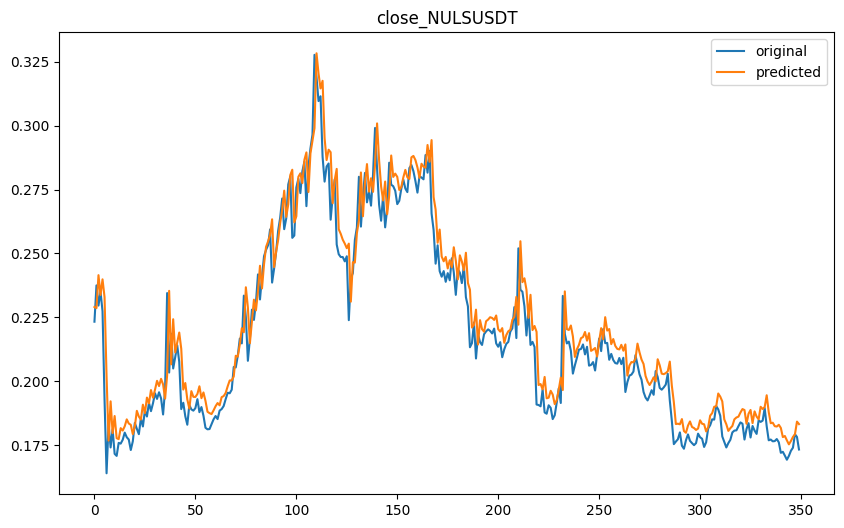

Metrics for 350 days: close_NULSUSDT MSE: 0.00010616701775053306, RMSE: 0.010303738047453121 MAPE: 0.03579965761365384
Metrics for 90 days: close_NULSUSDT MSE: 5.018561214777478e-05, RMSE: 0.0070841804146827584 MAPE: 0.03328726102075647
Metrics for 30 days: close_NULSUSDT MSE: 4.58245530708647e-05, RMSE: 0.006769383507444729 MAPE: 0.03351549909203526
Metrics for 7 days: close_NULSUSDT MSE: 3.501710435338532e-05, RMSE: 0.005917525188234125 MAPE: 0.029840648312284453


[I 2023-11-03 22:12:02,756] A new study created in RDB with name: close_VETUSDT
2023/11/03 22:12:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 2.0842e-04 - mean_absolute_percentage_error_keras: 43.9190


[I 2023-11-03 22:12:25,038] Trial 0 finished with value: 43.91904830932617 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 16, 'sequence_length': 3, 'learning_rate': 0.0008563137307328294, 'dropout_rate': 0.06310235757558369, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.1568627208773612, 'batch_size': 24}. Best is trial 0 with value: 43.91904830932617.
2023/11/03 22:12:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.4897e-06 - mean_absolute_percentage_error_keras: 4.6307


[I 2023-11-03 22:12:40,454] Trial 1 finished with value: 4.630683898925781 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 2, 'learning_rate': 0.00019037601521404072, 'dropout_rate': 0.05514593180056304, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.029259566120957925, 'batch_size': 24}. Best is trial 1 with value: 4.630683898925781.
2023/11/03 22:12:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 1.5889e-04 - mean_absolute_percentage_error_keras: 5.9403


[I 2023-11-03 22:13:09,087] Trial 2 finished with value: 5.940348148345947 and parameters: {'num_layers': 4, 'units_layer_0': 16, 'units_layer_1': 24, 'units_layer_2': 32, 'units_layer_3': 32, 'sequence_length': 3, 'learning_rate': 0.0002453221256398425, 'dropout_rate': 0.11990136731187645, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.2290057962223676, 'batch_size': 16}. Best is trial 1 with value: 4.630683898925781.
2023/11/03 22:13:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 0.0022 - mean_absolute_percentage_error_keras: 37.2129


[I 2023-11-03 22:13:48,409] Trial 3 finished with value: 37.21288299560547 and parameters: {'num_layers': 4, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 8, 'units_layer_3': 8, 'sequence_length': 3, 'learning_rate': 0.0005280588205357315, 'dropout_rate': 0.08836164673865393, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'relu', 'weight_decay': 0.4432013454627012, 'batch_size': 16}. Best is trial 1 with value: 4.630683898925781.
2023/11/03 22:13:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 3.2676e-04 - mean_absolute_percentage_error_keras: 28.2126


[I 2023-11-03 22:14:33,751] Trial 4 finished with value: 28.21255874633789 and parameters: {'num_layers': 4, 'units_layer_0': 8, 'units_layer_1': 32, 'units_layer_2': 8, 'units_layer_3': 32, 'sequence_length': 1, 'learning_rate': 0.00028728511145061444, 'dropout_rate': 0.33705433875076346, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'sigmoid', 'weight_decay': 0.3205166066568283, 'batch_size': 8}. Best is trial 1 with value: 4.630683898925781.
2023/11/03 22:14:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 2.4178e-05 - mean_absolute_percentage_error_keras: 13.9716


[I 2023-11-03 22:14:52,052] Trial 5 finished with value: 13.971583366394043 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 24, 'sequence_length': 4, 'learning_rate': 0.00010604102833104631, 'dropout_rate': 0.49975888046330674, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.478885334822971, 'batch_size': 32}. Best is trial 1 with value: 4.630683898925781.
2023/11/03 22:14:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 1.7517e-04 - mean_absolute_percentage_error_keras: 8.1228


[I 2023-11-03 22:15:33,901] Trial 6 finished with value: 8.122838020324707 and parameters: {'num_layers': 2, 'units_layer_0': 8, 'units_layer_1': 8, 'sequence_length': 3, 'learning_rate': 0.0009126678700278282, 'dropout_rate': 0.0005792579720525493, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'relu', 'weight_decay': 0.3026477170593397, 'batch_size': 8}. Best is trial 1 with value: 4.630683898925781.
2023/11/03 22:15:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:15:43,238] Trial 7 pruned. 
2023/11/03 22:15:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:15:48,728] T

9/9 [==============================] - 0s 2ms/step - loss: 9.4736e-05 - mean_absolute_percentage_error_keras: 4.0854


[I 2023-11-03 22:16:14,232] Trial 11 finished with value: 4.085404872894287 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.00025144761817645086, 'dropout_rate': 0.003193223508304033, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.07198381747856783, 'batch_size': 24}. Best is trial 11 with value: 4.085404872894287.
2023/11/03 22:16:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:16:18,002] Trial 12 pruned. 
2023/11/03 22:16:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 1.3606e-04 - mean_absolute_percentage_error_keras: 5.1894


[I 2023-11-03 22:16:27,196] Trial 13 finished with value: 5.189443588256836 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.00019592101710168286, 'dropout_rate': 0.0003279731186123999, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.08395558891557008, 'batch_size': 32}. Best is trial 11 with value: 4.085404872894287.
2023/11/03 22:16:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 7.6579e-06 - mean_absolute_percentage_error_keras: 4.1386


[I 2023-11-03 22:16:41,902] Trial 14 finished with value: 4.138552188873291 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.0003882496439726197, 'dropout_rate': 0.16766891659228378, 'min_max_scaling': 0, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.08811689538789921, 'batch_size': 24}. Best is trial 11 with value: 4.085404872894287.
2023/11/03 22:16:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 1.5053e-04 - mean_absolute_percentage_error_keras: 7.7509


[I 2023-11-03 22:16:57,928] Trial 15 finished with value: 7.750891208648682 and parameters: {'num_layers': 3, 'units_layer_0': 16, 'units_layer_1': 32, 'units_layer_2': 32, 'sequence_length': 2, 'learning_rate': 0.00039785399356541493, 'dropout_rate': 0.14899054439088194, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.09029918200512826, 'batch_size': 24}. Best is trial 11 with value: 4.085404872894287.
2023/11/03 22:16:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.7358e-06 - mean_absolute_percentage_error_keras: 3.6384


[I 2023-11-03 22:17:06,488] Trial 16 finished with value: 3.638425588607788 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0004417920274877816, 'dropout_rate': 0.165351527193077, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.1058684872262868, 'batch_size': 32}. Best is trial 16 with value: 3.638425588607788.
2023/11/03 22:17:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:17:09,544] Trial 17 pruned. 
2023/11/03 22:17:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.3400e-06 - mean_absolute_percentage_error_keras: 5.6924


[I 2023-11-03 22:17:23,855] Trial 18 finished with value: 5.6923956871032715 and parameters: {'num_layers': 3, 'units_layer_0': 24, 'units_layer_1': 32, 'units_layer_2': 16, 'sequence_length': 1, 'learning_rate': 0.0006317598521112129, 'dropout_rate': 0.1234219123591139, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.16177718293520463, 'batch_size': 32}. Best is trial 16 with value: 3.638425588607788.
2023/11/03 22:17:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:17:25.546197: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_120/simple_rnn_128/while/body/_1/sequential_120/simple_rnn_128/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernel

9/9 [==============================] - 0s 1ms/step - loss: 5.9252e-06 - mean_absolute_percentage_error_keras: 3.7265


[I 2023-11-03 22:17:36,542] Trial 20 finished with value: 3.726519823074341 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.0004483073569224462, 'dropout_rate': 0.18193490487871883, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.12526845565794614, 'batch_size': 32}. Best is trial 16 with value: 3.638425588607788.
2023/11/03 22:17:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.9856e-06 - mean_absolute_percentage_error_keras: 5.1190


[I 2023-11-03 22:17:44,568] Trial 21 finished with value: 5.119018077850342 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.00042697129589575706, 'dropout_rate': 0.18022886762938348, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.12420864546147439, 'batch_size': 32}. Best is trial 16 with value: 3.638425588607788.
2023/11/03 22:17:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:17:48,617] Trial 22 pruned. 
2023/11/03 22:17:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 9.7599e-06 - mean_absolute_percentage_error_keras: 5.2462


[I 2023-11-03 22:18:03,190] Trial 23 finished with value: 5.246211528778076 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.00033852244484065754, 'dropout_rate': 0.20376791117089227, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.062376567323264465, 'batch_size': 24}. Best is trial 16 with value: 3.638425588607788.
2023/11/03 22:18:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:18:06,340] Trial 24 pruned. 
2023/11/03 22:18:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.7512e-06 - mean_absolute_percentage_error_keras: 3.6345


[I 2023-11-03 22:18:15,379] Trial 25 finished with value: 3.6345486640930176 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0002572248031728157, 'dropout_rate': 0.13499405254499178, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.17185251491203274, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:18:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.7876e-06 - mean_absolute_percentage_error_keras: 6.2000


[I 2023-11-03 22:18:28,438] Trial 26 finished with value: 6.200031757354736 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 24, 'sequence_length': 1, 'learning_rate': 0.00048207630144323844, 'dropout_rate': 0.15643177465509087, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.18530149468934454, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:18:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 2.1199e-05 - mean_absolute_percentage_error_keras: 12.3887


[I 2023-11-03 22:18:38,032] Trial 27 finished with value: 12.388664245605469 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0003555802726537174, 'dropout_rate': 0.20309960625627926, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.18107069718627794, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:18:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:18:42,874] Trial 28 pruned. 
2023/11/03 22:18:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:18:46,291] Trial 29 prun

9/9 [==============================] - 0s 1ms/step - loss: 6.0250e-06 - mean_absolute_percentage_error_keras: 4.0205


[I 2023-11-03 22:19:08,121] Trial 31 finished with value: 4.020503520965576 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.00024078491826499282, 'dropout_rate': 0.06127514645495895, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.05098424347230854, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:19:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:19:12,068] Trial 32 pruned. 
2023/11/03 22:19:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 1.1280e-05 - mean_absolute_percentage_error_keras: 7.8217


[I 2023-11-03 22:19:23,200] Trial 33 finished with value: 7.821669101715088 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 3, 'learning_rate': 0.00033787141534007646, 'dropout_rate': 0.10938854151428738, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.04910568994049208, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:19:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.5571e-06 - mean_absolute_percentage_error_keras: 4.6299


[I 2023-11-03 22:19:34,598] Trial 34 finished with value: 4.629912853240967 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 2, 'learning_rate': 0.00022721941941718235, 'dropout_rate': 0.1338490413667939, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.09605581537641704, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:19:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.9598e-06 - mean_absolute_percentage_error_keras: 4.4617


[I 2023-11-03 22:19:47,195] Trial 35 finished with value: 4.461725234985352 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 3, 'learning_rate': 0.0002945011867539907, 'dropout_rate': 0.06816759137733795, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.04047959641638646, 'batch_size': 16}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:19:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:19:55,609] Trial 36 pruned. 
2023/11/03 22:19:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:19:59,856] Trial 37 pruned. 

9/9 [==============================] - 0s 3ms/step - loss: 1.8701e-04 - mean_absolute_percentage_error_keras: 7.5187


[I 2023-11-03 22:20:32,415] Trial 41 finished with value: 7.5187249183654785 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.0002384923691976009, 'dropout_rate': 0.03144406242040167, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.08745871204256726, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:20:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 1.1759e-04 - mean_absolute_percentage_error_keras: 4.6391


[I 2023-11-03 22:20:45,076] Trial 42 finished with value: 4.639130592346191 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.00018287816487940628, 'dropout_rate': 0.01854087481840004, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.07288823996884297, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:20:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.7593e-06 - mean_absolute_percentage_error_keras: 3.7190


[I 2023-11-03 22:20:55,989] Trial 43 finished with value: 3.7190234661102295 and parameters: {'num_layers': 1, 'units_layer_0': 8, 'sequence_length': 3, 'learning_rate': 0.0002864190002827418, 'dropout_rate': 0.07212208137757843, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.036025271337902454, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:20:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:21:00,335] Trial 44 pruned. 
2023/11/03 22:21:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:21:06,468] Trial 45 pruned.

9/9 [==============================] - 0s 1ms/step - loss: 1.1188e-05 - mean_absolute_percentage_error_keras: 6.6340


[I 2023-11-03 22:21:56,794] Trial 50 finished with value: 6.633962154388428 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.0005035160085266454, 'dropout_rate': 0.03470190817262514, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.05090220798035049, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:21:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:22:01,046] Trial 51 pruned. 
2023/11/03 22:22:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:22:07,427] Trial 52 pruned. 

9/9 [==============================] - 0s 2ms/step - loss: 8.8333e-06 - mean_absolute_percentage_error_keras: 5.1750


[I 2023-11-03 22:22:26,340] Trial 55 finished with value: 5.175041675567627 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.00012024699393161032, 'dropout_rate': 0.002831212036931957, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.07209862052225718, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:22:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.7563e-06 - mean_absolute_percentage_error_keras: 3.6873


[I 2023-11-03 22:22:36,034] Trial 56 finished with value: 3.6873080730438232 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00027500407255945516, 'dropout_rate': 0.08285549071448572, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.050499191594769045, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:22:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 7.3716e-06 - mean_absolute_percentage_error_keras: 5.8283


[I 2023-11-03 22:22:48,845] Trial 57 finished with value: 5.828287601470947 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 16, 'sequence_length': 1, 'learning_rate': 0.00028969103308492365, 'dropout_rate': 0.12157819191369117, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.0034470997998911485, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:22:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:22:50.438635: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_159/simple_rnn_175/while/body/_1/sequential_159/simple_rnn_175/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:22

9/9 [==============================] - 0s 2ms/step - loss: 6.4993e-06 - mean_absolute_percentage_error_keras: 4.2878


[I 2023-11-03 22:23:09,781] Trial 60 finished with value: 4.287785053253174 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00017228606604612697, 'dropout_rate': 0.12406216933724912, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.020868645893691067, 'batch_size': 16}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:23:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 7.0616e-06 - mean_absolute_percentage_error_keras: 4.4657


[I 2023-11-03 22:23:22,588] Trial 61 finished with value: 4.4656500816345215 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.00020449069742241245, 'dropout_rate': 0.039125237104979935, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.08421159377504357, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:23:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 6.4534e-06 - mean_absolute_percentage_error_keras: 4.5470


[I 2023-11-03 22:23:32,156] Trial 62 finished with value: 4.547030925750732 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00027694125460032916, 'dropout_rate': 0.05970441478788896, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.10331690152557636, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:23:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 9.2003e-06 - mean_absolute_percentage_error_keras: 6.8305


[I 2023-11-03 22:23:41,293] Trial 63 finished with value: 6.8305158615112305 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.00024289416057593846, 'dropout_rate': 0.09809381196621486, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.06195943556696548, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:23:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:23:44,467] Trial 64 pruned. 
2023/11/03 22:23:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:23:48,357] Trial 65 pruned

9/9 [==============================] - 0s 2ms/step - loss: 6.1344e-06 - mean_absolute_percentage_error_keras: 3.9683


[I 2023-11-03 22:23:59,946] Trial 66 finished with value: 3.968282699584961 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 8, 'sequence_length': 2, 'learning_rate': 0.00019844815227491966, 'dropout_rate': 0.14687947785282454, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.02451903365410639, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:23:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:24:04,821] Trial 67 pruned. 
2023/11/03 22:24:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:24:10,1

9/9 [==============================] - 0s 3ms/step - loss: 7.5087e-06 - mean_absolute_percentage_error_keras: 4.2741


[I 2023-11-03 22:24:26,656] Trial 69 finished with value: 4.274054527282715 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 16, 'sequence_length': 2, 'learning_rate': 0.0002594141751328121, 'dropout_rate': 0.13715228691028492, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.002530849598482099, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:24:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:24:28.355042: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_171/simple_rnn_191/while/body/_1/sequential_171/simple_rnn_191/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:24:2

9/9 [==============================] - 0s 2ms/step - loss: 7.2979e-06 - mean_absolute_percentage_error_keras: 5.0418


[I 2023-11-03 22:24:37,832] Trial 70 finished with value: 5.0417799949646 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 8, 'sequence_length': 1, 'learning_rate': 0.0003430592437656018, 'dropout_rate': 0.19332229887406444, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.05316125759652092, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:24:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:24:42,235] Trial 71 pruned. 
2023/11/03 22:24:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:24:45,8

9/9 [==============================] - 0s 2ms/step - loss: 8.0797e-06 - mean_absolute_percentage_error_keras: 5.4717


[I 2023-11-03 22:24:56,670] Trial 73 finished with value: 5.4716973304748535 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 0.00031216485352886665, 'dropout_rate': 0.08745140318556821, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.04330900343877985, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:24:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:25:01,899] Trial 74 pruned. 
2023/11/03 22:25:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 8.0253e-06 - mean_absolute_percentage_error_keras: 4.2450


[I 2023-11-03 22:25:14,418] Trial 75 finished with value: 4.245002269744873 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.00026704259659438793, 'dropout_rate': 0.13405800177522573, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.03100352269929435, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:25:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.3708e-06 - mean_absolute_percentage_error_keras: 3.7937


[I 2023-11-03 22:25:27,150] Trial 76 finished with value: 3.7937495708465576 and parameters: {'num_layers': 3, 'units_layer_0': 8, 'units_layer_1': 16, 'units_layer_2': 16, 'sequence_length': 1, 'learning_rate': 0.00023281434401538754, 'dropout_rate': 0.16906240286171592, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.12520235424739862, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:25:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:25:38,672] Trial 77 pruned. 
2023/11/03 22:25:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I

9/9 [==============================] - 0s 2ms/step - loss: 2.0217e-05 - mean_absolute_percentage_error_keras: 10.7724


[I 2023-11-03 22:26:00,134] Trial 79 finished with value: 10.772353172302246 and parameters: {'num_layers': 3, 'units_layer_0': 8, 'units_layer_1': 16, 'units_layer_2': 24, 'sequence_length': 1, 'learning_rate': 0.0002926199553653193, 'dropout_rate': 0.15071513337221773, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.1692948354534402, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:26:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 9.5965e-06 - mean_absolute_percentage_error_keras: 7.6982


[I 2023-11-03 22:26:16,859] Trial 80 finished with value: 7.698223114013672 and parameters: {'num_layers': 4, 'units_layer_0': 24, 'units_layer_1': 16, 'units_layer_2': 32, 'units_layer_3': 16, 'sequence_length': 1, 'learning_rate': 0.000458137552539757, 'dropout_rate': 0.16031720128676769, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.1456456062562496, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:26:16 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:26:24,021] Trial 81 pruned. 
2023/11/03 22:26:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try up

9/9 [==============================] - 0s 1ms/step - loss: 5.9720e-06 - mean_absolute_percentage_error_keras: 4.2877


[I 2023-11-03 22:26:34,857] Trial 82 finished with value: 4.28773832321167 and parameters: {'num_layers': 1, 'units_layer_0': 8, 'sequence_length': 2, 'learning_rate': 0.0001904107200435956, 'dropout_rate': 0.10334294556242762, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.06607449995794006, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:26:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 7.7464e-06 - mean_absolute_percentage_error_keras: 4.6371


[I 2023-11-03 22:26:51,447] Trial 83 finished with value: 4.637111186981201 and parameters: {'num_layers': 3, 'units_layer_0': 16, 'units_layer_1': 8, 'units_layer_2': 16, 'sequence_length': 2, 'learning_rate': 0.0003128846444372535, 'dropout_rate': 0.04823116544077898, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.08648552315463823, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:26:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:26:55,269] Trial 84 pruned. 
2023/11/03 22:26:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.8460e-06 - mean_absolute_percentage_error_keras: 3.6683


[I 2023-11-03 22:27:06,966] Trial 85 finished with value: 3.66833233833313 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00027744564529583204, 'dropout_rate': 0.19541544832464366, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.10138485298778144, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:27:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.7436e-06 - mean_absolute_percentage_error_keras: 5.0653


[I 2023-11-03 22:27:18,838] Trial 86 finished with value: 5.0652923583984375 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0002265285029841171, 'dropout_rate': 0.19503553124796502, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.13175614890143156, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:27:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 9.2440e-06 - mean_absolute_percentage_error_keras: 7.1219


[I 2023-11-03 22:27:34,703] Trial 87 finished with value: 7.121936798095703 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 24, 'sequence_length': 1, 'learning_rate': 0.00028684987466961467, 'dropout_rate': 0.16995960092503778, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.0991860559574458, 'batch_size': 16}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:27:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:27:38,590] Trial 88 pruned. 
2023/11/03 22:27:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:27:4

9/9 [==============================] - 0s 2ms/step - loss: 6.0583e-06 - mean_absolute_percentage_error_keras: 3.9220


[I 2023-11-03 22:27:51,286] Trial 90 finished with value: 3.922010660171509 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00038814750978860134, 'dropout_rate': 0.14305493230667415, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.07815894721392987, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:27:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.2790e-06 - mean_absolute_percentage_error_keras: 4.1773


[I 2023-11-03 22:27:58,977] Trial 91 finished with value: 4.177300930023193 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00038339233355667266, 'dropout_rate': 0.14646685044259428, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.07746752543487953, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:27:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.9438e-06 - mean_absolute_percentage_error_keras: 4.0686


[I 2023-11-03 22:28:07,836] Trial 92 finished with value: 4.068632125854492 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0002815924825203146, 'dropout_rate': 0.16414194519233055, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.058802958112288875, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:28:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.2657e-06 - mean_absolute_percentage_error_keras: 5.1587


[I 2023-11-03 22:28:17,527] Trial 93 finished with value: 5.1587443351745605 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0002575866693318518, 'dropout_rate': 0.11249217057009872, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.09999138109894413, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:28:17 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:28:22,406] Trial 94 pruned. 
2023/11/03 22:28:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.6543e-06 - mean_absolute_percentage_error_keras: 5.7650


[I 2023-11-03 22:28:35,719] Trial 95 finished with value: 5.7650370597839355 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00036836930226876027, 'dropout_rate': 0.13103607301604484, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.014880621279978384, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:28:35 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:28:39,590] Trial 96 pruned. 
2023/11/03 22:28:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 9.7535e-06 - mean_absolute_percentage_error_keras: 8.0767


[I 2023-11-03 22:28:54,445] Trial 97 finished with value: 8.076746940612793 and parameters: {'num_layers': 4, 'units_layer_0': 24, 'units_layer_1': 16, 'units_layer_2': 24, 'units_layer_3': 24, 'sequence_length': 1, 'learning_rate': 0.00032512931194043844, 'dropout_rate': 0.0762447458668788, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.06724287879263849, 'batch_size': 32}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:28:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 9.1613e-06 - mean_absolute_percentage_error_keras: 6.4580


[I 2023-11-03 22:29:05,253] Trial 98 finished with value: 6.458040714263916 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 3, 'learning_rate': 0.0004357768763845438, 'dropout_rate': 0.1444007444034346, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.03798408405073171, 'batch_size': 24}. Best is trial 25 with value: 3.6345486640930176.
2023/11/03 22:29:05 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.9797e-06 - mean_absolute_percentage_error_keras: 5.3348


[I 2023-11-03 22:29:19,181] Trial 99 finished with value: 5.334775447845459 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.00030128637082667525, 'dropout_rate': 0.09470339422754065, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.11942308907287577, 'batch_size': 16}. Best is trial 25 with value: 3.6345486640930176.


Best Hyperparameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0002572248031728157, 'dropout_rate': 0.13499405254499178, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.17185251491203274, 'batch_size': 24}
Epoch 1/100
59/59 [==============================] - 2s 11ms/step - loss: 0.0046 - mean_absolute_percentage_error_keras: 282.3688
Epoch 2/100
59/59 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_percentage_error_keras: 395.8236
Epoch 3/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_percentage_error_keras: 352.5741
Epoch 4/100
59/59 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_percentage_error_keras: 325.9939
Epoch 5/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_percentage_error_keras: 296.4767
Epoch 6/100
59/59 [==============================] - 

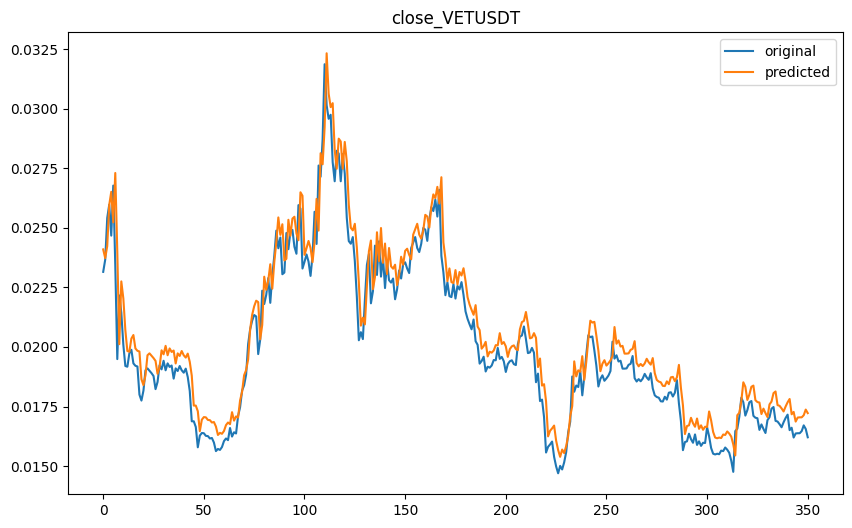

[I 2023-11-03 22:29:38,130] A new study created in RDB with name: close_IOTAUSDT
2023/11/03 22:29:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Metrics for 351 days: close_VETUSDT MSE: 1.0408848775961818e-06, RMSE: 0.001020237657409381 MAPE: 0.04143716900512231
Metrics for 90 days: close_VETUSDT MSE: 6.280964223995147e-07, RMSE: 0.000792525344957191 MAPE: 0.04254690163178168
Metrics for 30 days: close_VETUSDT MSE: 5.720827352420744e-07, RMSE: 0.0007563615109470301 MAPE: 0.041738875881697966
Metrics for 7 days: close_VETUSDT MSE: 4.75292118286059e-07, RMSE: 0.0006894143299105836 MAPE: 0.04048340433048577
9/9 [==============================] - 0s 2ms/step - loss: 3.4105e-04 - mean_absolute_percentage_error_keras: 9.6254


[I 2023-11-03 22:29:54,727] Trial 0 finished with value: 9.625398635864258 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 3, 'learning_rate': 0.0005533868294500905, 'dropout_rate': 0.32622569838315557, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'RMSprop', 'activation': 'sigmoid', 'weight_decay': 0.04259104730727953, 'batch_size': 16}. Best is trial 0 with value: 9.625398635864258.
2023/11/03 22:29:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 1s 4ms/step - loss: 9.1701e-04 - mean_absolute_percentage_error_keras: 29.1070


[I 2023-11-03 22:30:31,997] Trial 1 finished with value: 29.107032775878906 and parameters: {'num_layers': 4, 'units_layer_0': 16, 'units_layer_1': 24, 'units_layer_2': 24, 'units_layer_3': 16, 'sequence_length': 1, 'learning_rate': 0.0007001596405690667, 'dropout_rate': 0.4459065084333044, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.14023778822817579, 'batch_size': 8}. Best is trial 0 with value: 9.625398635864258.
2023/11/03 22:30:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_absolute_percentage_error_keras: 113.4689


[I 2023-11-03 22:31:07,166] Trial 2 finished with value: 113.46894836425781 and parameters: {'num_layers': 3, 'units_layer_0': 8, 'units_layer_1': 8, 'units_layer_2': 24, 'sequence_length': 3, 'learning_rate': 3.651906440551018e-05, 'dropout_rate': 0.39003933916546585, 'min_max_scaling': 1, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.11936016682419015, 'batch_size': 16}. Best is trial 0 with value: 9.625398635864258.
2023/11/03 22:31:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.1210e-04 - mean_absolute_percentage_error_keras: 18.1401


[I 2023-11-03 22:31:47,254] Trial 3 finished with value: 18.140127182006836 and parameters: {'num_layers': 3, 'units_layer_0': 8, 'units_layer_1': 8, 'units_layer_2': 32, 'sequence_length': 4, 'learning_rate': 0.0007865066949349927, 'dropout_rate': 0.09686296579070475, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.34318369879043503, 'batch_size': 16}. Best is trial 0 with value: 9.625398635864258.
2023/11/03 22:31:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_percentage_error_keras: 7.3259


[I 2023-11-03 22:32:53,637] Trial 4 finished with value: 7.325939178466797 and parameters: {'num_layers': 3, 'units_layer_0': 32, 'units_layer_1': 8, 'units_layer_2': 32, 'sequence_length': 5, 'learning_rate': 0.0007200209107708868, 'dropout_rate': 0.2977366144566286, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'tanh', 'weight_decay': 0.2975336022748273, 'batch_size': 8}. Best is trial 4 with value: 7.325939178466797.
2023/11/03 22:32:53 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 2.2198e-04 - mean_absolute_percentage_error_keras: 11.6863


[I 2023-11-03 22:33:23,779] Trial 5 finished with value: 11.686325073242188 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 3, 'learning_rate': 0.0009161428174715, 'dropout_rate': 0.1096841207238004, 'min_max_scaling': 1, 'layer_type': 'LSTM', 'optimizer': 'Adam', 'activation': 'sigmoid', 'weight_decay': 0.08095865307319206, 'batch_size': 8}. Best is trial 4 with value: 7.325939178466797.
2023/11/03 22:33:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:33:42,959] Trial 6 pruned. 
2023/11/03 22:33:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:33:50,678] Trial 7 pruned. 
2023

9/9 [==============================] - 0s 2ms/step - loss: 9.5828e-04 - mean_absolute_percentage_error_keras: 5.4411


[I 2023-11-03 22:34:15,863] Trial 8 finished with value: 5.4410834312438965 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 4, 'learning_rate': 0.00021928182394136654, 'dropout_rate': 0.36039978663822886, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'Adam', 'activation': 'relu', 'weight_decay': 0.27002801021518347, 'batch_size': 8}. Best is trial 8 with value: 5.4410834312438965.
2023/11/03 22:34:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:34:26,733] Trial 9 pruned. 
2023/11/03 22:34:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:34:28.358947: W tensorflow/core/g

9/9 [==============================] - 0s 2ms/step - loss: 7.9080e-04 - mean_absolute_percentage_error_keras: 4.3569


[I 2023-11-03 22:34:37,985] Trial 10 finished with value: 4.35686731338501 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 32, 'sequence_length': 1, 'learning_rate': 0.00023124333631272065, 'dropout_rate': 0.014681783232056433, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4686488216512626, 'batch_size': 32}. Best is trial 10 with value: 4.35686731338501.
2023/11/03 22:34:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:34:39.645851: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_213/simple_rnn_255/while/body/_1/sequential_213/simple_rnn_255/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:34:3

9/9 [==============================] - 0s 2ms/step - loss: 5.8099e-04 - mean_absolute_percentage_error_keras: 3.5806


[I 2023-11-03 22:34:48,325] Trial 11 finished with value: 3.580596923828125 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 32, 'sequence_length': 1, 'learning_rate': 0.00022431638047711128, 'dropout_rate': 0.01589886699410048, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.466104066574505, 'batch_size': 32}. Best is trial 11 with value: 3.580596923828125.
2023/11/03 22:34:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:34:49.899139: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_214/simple_rnn_257/while/body/_1/sequential_214/simple_rnn_257/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:34:4

9/9 [==============================] - 0s 1ms/step - loss: 8.6663e-04 - mean_absolute_percentage_error_keras: 4.2942


[I 2023-11-03 22:34:59,080] Trial 12 finished with value: 4.294200897216797 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 32, 'sequence_length': 1, 'learning_rate': 0.0002972058297173672, 'dropout_rate': 0.009735668209291934, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.49517071644494376, 'batch_size': 32}. Best is trial 11 with value: 3.580596923828125.
2023/11/03 22:34:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:35:00.825842: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_215/simple_rnn_259/while/body/_1/sequential_215/simple_rnn_259/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:35

9/9 [==============================] - 0s 1ms/step - loss: 5.8512e-04 - mean_absolute_percentage_error_keras: 3.9162


[I 2023-11-03 22:35:08,777] Trial 13 finished with value: 3.916154146194458 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 32, 'sequence_length': 1, 'learning_rate': 0.0003183654122706145, 'dropout_rate': 0.02046301999598859, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.49572637598199226, 'batch_size': 32}. Best is trial 11 with value: 3.580596923828125.
2023/11/03 22:35:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:35:10.189685: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_216/simple_rnn_261/while/body/_1/sequential_216/simple_rnn_261/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:35:

9/9 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_percentage_error_keras: 5.5414


[I 2023-11-03 22:35:31,100] Trial 14 finished with value: 5.541436672210693 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 32, 'sequence_length': 2, 'learning_rate': 0.0003293074260978481, 'dropout_rate': 0.10282849158633298, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4315983772207216, 'batch_size': 32}. Best is trial 11 with value: 3.580596923828125.
2023/11/03 22:35:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.5805e-04 - mean_absolute_percentage_error_keras: 4.3415


[I 2023-11-03 22:35:43,546] Trial 15 finished with value: 4.341502666473389 and parameters: {'num_layers': 2, 'units_layer_0': 24, 'units_layer_1': 24, 'sequence_length': 2, 'learning_rate': 0.0004005707569561295, 'dropout_rate': 0.20278067696917518, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.41941853028094495, 'batch_size': 24}. Best is trial 11 with value: 3.580596923828125.
2023/11/03 22:35:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:35:44.510969: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_218/simple_rnn_265/while/body/_1/sequential_218/simple_rnn_265/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:35:

9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_absolute_percentage_error_keras: 6.2426


[I 2023-11-03 22:35:52,190] Trial 16 finished with value: 6.242609977722168 and parameters: {'num_layers': 1, 'units_layer_0': 16, 'sequence_length': 2, 'learning_rate': 7.69922937473149e-05, 'dropout_rate': 0.17677721206469957, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4990109626518351, 'batch_size': 32}. Best is trial 11 with value: 3.580596923828125.
2023/11/03 22:35:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.6580e-04 - mean_absolute_percentage_error_keras: 3.5655


[I 2023-11-03 22:36:03,929] Trial 17 finished with value: 3.565544605255127 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 16, 'sequence_length': 1, 'learning_rate': 0.00013312407424696912, 'dropout_rate': 0.006798307953237881, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.37812475144098057, 'batch_size': 24}. Best is trial 17 with value: 3.565544605255127.
2023/11/03 22:36:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 7ms/step - loss: 7.7159e-04 - mean_absolute_percentage_error_keras: 4.6646


[I 2023-11-03 22:36:19,369] Trial 18 finished with value: 4.664618968963623 and parameters: {'num_layers': 3, 'units_layer_0': 32, 'units_layer_1': 16, 'units_layer_2': 8, 'sequence_length': 2, 'learning_rate': 0.00012839518639584427, 'dropout_rate': 0.06459945674756915, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3510165011641291, 'batch_size': 24}. Best is trial 17 with value: 3.565544605255127.
2023/11/03 22:36:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.3255e-04 - mean_absolute_percentage_error_keras: 3.6556


[I 2023-11-03 22:36:41,587] Trial 19 finished with value: 3.6555826663970947 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 1.5352806471459463e-05, 'dropout_rate': 0.15101957907940544, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4125790457816228, 'batch_size': 24}. Best is trial 17 with value: 3.565544605255127.
2023/11/03 22:36:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:36:45,570] Trial 20 pruned. 
2023/11/03 22:36:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.8234e-04 - mean_absolute_percentage_error_keras: 3.5517


[I 2023-11-03 22:36:55,495] Trial 21 finished with value: 3.55171537399292 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 9.626498146340494e-06, 'dropout_rate': 0.16232405961111632, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.412650498124566, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:36:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.9618e-04 - mean_absolute_percentage_error_keras: 3.7997


[I 2023-11-03 22:37:06,873] Trial 22 finished with value: 3.799683094024658 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 9.877531068259288e-06, 'dropout_rate': 0.13393474134809905, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4307613547843878, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:37:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:37:08.405789: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_225/simple_rnn_276/while/body/_1/sequential_225/simple_rnn_276/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:37:08.407687: W tensorflow

9/9 [==============================] - 0s 6ms/step - loss: 6.8070e-04 - mean_absolute_percentage_error_keras: 3.7945


[I 2023-11-03 22:37:22,577] Trial 23 finished with value: 3.7944815158843994 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 16, 'sequence_length': 1, 'learning_rate': 0.0001203713480860591, 'dropout_rate': 0.05356166544864609, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3622144188847137, 'batch_size': 16}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:37:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 0.0013 - mean_absolute_percentage_error_keras: 6.0522


[I 2023-11-03 22:37:33,553] Trial 24 finished with value: 6.05222749710083 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 0.00017620104427144793, 'dropout_rate': 0.0010485245687443297, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.39098845007023353, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:37:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 6.1955e-04 - mean_absolute_percentage_error_keras: 3.6827


[I 2023-11-03 22:37:45,131] Trial 25 finished with value: 3.682676076889038 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 24, 'sequence_length': 1, 'learning_rate': 0.00010312201074831064, 'dropout_rate': 0.07249045579669805, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.33274490181087324, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:37:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:37:46.155039: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_228/simple_rnn_281/while/body/_1/sequential_228/simple_rnn_281/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:37:

9/9 [==============================] - 0s 2ms/step - loss: 6.6393e-04 - mean_absolute_percentage_error_keras: 3.8612


[I 2023-11-03 22:37:52,855] Trial 26 finished with value: 3.8612375259399414 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 7.016742258227943e-05, 'dropout_rate': 0.1421757386826576, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.45068665556839377, 'batch_size': 32}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:37:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:37:58,501] Trial 27 pruned. 
2023/11/03 22:37:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:38:06,749] Trial 28 pruned.

9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_absolute_percentage_error_keras: 6.5760


[I 2023-11-03 22:38:27,426] Trial 30 finished with value: 6.575974464416504 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 1, 'learning_rate': 0.0001652446940360747, 'dropout_rate': 0.033623582310886205, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'sigmoid', 'weight_decay': 0.38327504414623936, 'batch_size': 16}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:38:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.0322e-04 - mean_absolute_percentage_error_keras: 3.6630


[I 2023-11-03 22:38:38,821] Trial 31 finished with value: 3.663041830062866 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 2.858788153662403e-06, 'dropout_rate': 0.15970518408164858, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.41846964528009695, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:38:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.6558e-04 - mean_absolute_percentage_error_keras: 4.6231


[I 2023-11-03 22:38:48,759] Trial 32 finished with value: 4.6231303215026855 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 8.386935607663812e-05, 'dropout_rate': 0.12404242263004925, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4033514286898844, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:38:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:38:55,662] Trial 33 pruned. 
2023/11/03 22:38:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:38:56.945071: W tensorflow/cor

9/9 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_absolute_percentage_error_keras: 6.8830


[I 2023-11-03 22:39:22,936] Trial 36 finished with value: 6.883015155792236 and parameters: {'num_layers': 3, 'units_layer_0': 32, 'units_layer_1': 24, 'units_layer_2': 8, 'sequence_length': 1, 'learning_rate': 5.321758536390309e-05, 'dropout_rate': 0.10934679660345628, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3119940219933345, 'batch_size': 16}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:39:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:39:26,797] Trial 37 pruned. 
2023/11/03 22:39:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 5ms/step - loss: 6.3009e-04 - mean_absolute_percentage_error_keras: 4.2504


[I 2023-11-03 22:39:42,306] Trial 38 finished with value: 4.250439643859863 and parameters: {'num_layers': 2, 'units_layer_0': 8, 'units_layer_1': 16, 'sequence_length': 2, 'learning_rate': 0.00013859128022636978, 'dropout_rate': 0.09622527855182283, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'tanh', 'weight_decay': 0.46804681609402654, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:39:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:39:54,101] Trial 39 pruned. 
2023/11/03 22:39:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:39:58,

9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_percentage_error_keras: 5.1965


[I 2023-11-03 22:40:10,835] Trial 41 finished with value: 5.196493148803711 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 2.9187566411538274e-05, 'dropout_rate': 0.15942131313243618, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.42507670546451365, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:40:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.9132e-04 - mean_absolute_percentage_error_keras: 4.1622


[I 2023-11-03 22:40:23,289] Trial 42 finished with value: 4.162234783172607 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 1.3590297839526802e-05, 'dropout_rate': 0.24126605966011594, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.40964660675749914, 'batch_size': 24}. Best is trial 21 with value: 3.55171537399292.
2023/11/03 22:40:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.6349e-04 - mean_absolute_percentage_error_keras: 3.5367


[I 2023-11-03 22:40:33,862] Trial 43 finished with value: 3.536653757095337 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00011719375401897883, 'dropout_rate': 0.11602283925063195, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.34266339146669433, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:40:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 7.9819e-04 - mean_absolute_percentage_error_keras: 5.0966


[I 2023-11-03 22:40:46,583] Trial 44 finished with value: 5.096633434295654 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00011408194259165681, 'dropout_rate': 0.11567501302030177, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3044731558063273, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:40:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:40:51,651] Trial 45 pruned. 
2023/11/03 22:40:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:40:57,193] Trial 46 pruned

9/9 [==============================] - 0s 2ms/step - loss: 6.7312e-04 - mean_absolute_percentage_error_keras: 3.8527


[I 2023-11-03 22:41:36,632] Trial 51 finished with value: 3.852691173553467 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 4.270737438536901e-05, 'dropout_rate': 0.16032848291767537, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.40095936149715483, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:41:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.8027e-04 - mean_absolute_percentage_error_keras: 3.7338


[I 2023-11-03 22:41:45,710] Trial 52 finished with value: 3.7337541580200195 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00010267481653819311, 'dropout_rate': 0.19138678655536065, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.415475374524309, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:41:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 7.2551e-04 - mean_absolute_percentage_error_keras: 4.8664


[I 2023-11-03 22:41:57,254] Trial 53 finished with value: 4.86644983291626 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 1.2636112349664273e-05, 'dropout_rate': 0.1299166835954161, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4472774928386213, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:41:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 5.9604e-04 - mean_absolute_percentage_error_keras: 3.6367


[I 2023-11-03 22:42:07,651] Trial 54 finished with value: 3.6367244720458984 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.0001354760464076985, 'dropout_rate': 0.14506040153382993, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3831244555361347, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:42:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.9157e-04 - mean_absolute_percentage_error_keras: 3.6920


[I 2023-11-03 22:42:16,361] Trial 55 finished with value: 3.6920177936553955 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00013404693751682334, 'dropout_rate': 0.08939201565472188, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3393973344031259, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:42:16 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:42:17.825027: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_258/simple_rnn_321/while/body/_1/sequential_258/simple_rnn_321/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:42:17.827087: W tensorf

9/9 [==============================] - 0s 3ms/step - loss: 9.1702e-04 - mean_absolute_percentage_error_keras: 4.3106


[I 2023-11-03 22:42:33,888] Trial 56 finished with value: 4.310607433319092 and parameters: {'num_layers': 2, 'units_layer_0': 32, 'units_layer_1': 32, 'sequence_length': 1, 'learning_rate': 0.00017328994843827033, 'dropout_rate': 0.1391974753549957, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3843701887704869, 'batch_size': 16}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:42:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.5789e-04 - mean_absolute_percentage_error_keras: 3.8072


[I 2023-11-03 22:42:43,740] Trial 57 finished with value: 3.8071963787078857 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 8.682411911887178e-05, 'dropout_rate': 0.05997587214146771, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.34963489286525823, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:42:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 8.5279e-04 - mean_absolute_percentage_error_keras: 4.0208


[I 2023-11-03 22:42:54,108] Trial 58 finished with value: 4.020763397216797 and parameters: {'num_layers': 2, 'units_layer_0': 8, 'units_layer_1': 8, 'sequence_length': 1, 'learning_rate': 0.00025822258624107, 'dropout_rate': 0.04544447283833444, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.39052840119547405, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:42:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:42:59,332] Trial 59 pruned. 
2023/11/03 22:43:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:43:07,181

9/9 [==============================] - 0s 2ms/step - loss: 6.1857e-04 - mean_absolute_percentage_error_keras: 3.6044


[I 2023-11-03 22:43:19,448] Trial 61 finished with value: 3.6044156551361084 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 3.0516028717722608e-06, 'dropout_rate': 0.1683381845096593, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4294562671605292, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:43:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:43:23,790] Trial 62 pruned. 
2023/11/03 22:43:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 6.6130e-04 - mean_absolute_percentage_error_keras: 3.6735


[I 2023-11-03 22:43:32,835] Trial 63 finished with value: 3.673530340194702 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 9.312517875872527e-05, 'dropout_rate': 0.2112849803135688, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.45624066836782545, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:43:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 6.4654e-04 - mean_absolute_percentage_error_keras: 3.6712


[I 2023-11-03 22:43:44,334] Trial 64 finished with value: 3.6712324619293213 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00012150151561285169, 'dropout_rate': 0.11612050343340463, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4449436788820607, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:43:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 8.4050e-04 - mean_absolute_percentage_error_keras: 4.4374


[I 2023-11-03 22:43:53,274] Trial 65 finished with value: 4.437364101409912 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 6.199609030997282e-05, 'dropout_rate': 0.1703521493122794, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4282423294340444, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:43:53 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:43:56,660] Trial 66 pruned. 
2023/11/03 22:43:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:44:02,115] Trial 67 pruned. 

9/9 [==============================] - 0s 4ms/step - loss: 6.1607e-04 - mean_absolute_percentage_error_keras: 3.7717


[I 2023-11-03 22:44:21,184] Trial 69 finished with value: 3.771740674972534 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 2, 'learning_rate': 3.556939163741018e-05, 'dropout_rate': 0.13183221395955513, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.41847153638131884, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:44:21 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:44:22.594351: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_272/simple_rnn_339/while/body/_1/sequential_272/simple_rnn_339/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:44:22.612244: E tensorfl

9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_absolute_percentage_error_keras: 6.5686


[I 2023-11-03 22:44:29,081] Trial 70 finished with value: 6.568627834320068 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 4.798267178017535e-06, 'dropout_rate': 0.08799533793548492, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3926524116996323, 'batch_size': 32}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:44:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 8.0882e-04 - mean_absolute_percentage_error_keras: 4.5006


[I 2023-11-03 22:44:40,719] Trial 71 finished with value: 4.500576496124268 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 7.288977501669283e-05, 'dropout_rate': 0.15740964131381244, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.41774705411222723, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:44:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 6.6367e-04 - mean_absolute_percentage_error_keras: 4.4431


[I 2023-11-03 22:44:52,476] Trial 72 finished with value: 4.443078517913818 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 5.253370874710575e-06, 'dropout_rate': 0.14727768201213373, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.37807411548646597, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:44:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 6.1742e-04 - mean_absolute_percentage_error_keras: 3.6329


[I 2023-11-03 22:45:02,787] Trial 73 finished with value: 3.632864236831665 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00010581232935032237, 'dropout_rate': 0.16784296355936457, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.43654734103686105, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:45:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 6.4538e-04 - mean_absolute_percentage_error_keras: 3.6608


[I 2023-11-03 22:45:12,551] Trial 74 finished with value: 3.660780906677246 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00018182685706603916, 'dropout_rate': 0.16772865619714408, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.45690564474312584, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:45:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:45:17,108] Trial 75 pruned. 
2023/11/03 22:45:17 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.9282e-04 - mean_absolute_percentage_error_keras: 4.4554


[I 2023-11-03 22:45:28,437] Trial 76 finished with value: 4.45535945892334 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00022374867642455264, 'dropout_rate': 0.1248891400142655, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3626232145560082, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:45:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:45:30.893464: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_279/simple_rnn_346/while/body/_74/sequential_279/simple_rnn_346/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2023-11-03 22:45:30.896414: W tensorflo

9/9 [==============================] - 0s 2ms/step - loss: 6.3777e-04 - mean_absolute_percentage_error_keras: 3.8946


[I 2023-11-03 22:46:03,651] Trial 81 finished with value: 3.8945555686950684 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00017718068496886042, 'dropout_rate': 0.14120288808103224, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.45665996362695077, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:46:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_absolute_percentage_error_keras: 5.0142


[I 2023-11-03 22:46:15,678] Trial 82 finished with value: 5.014193058013916 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.0001919992277846473, 'dropout_rate': 0.16321922953380757, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.44115548659889103, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:46:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 5.9932e-04 - mean_absolute_percentage_error_keras: 3.9964


[I 2023-11-03 22:46:28,848] Trial 83 finished with value: 3.9963936805725098 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00013991098540961535, 'dropout_rate': 0.1697160084956914, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4564100255683246, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:46:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 8.2295e-04 - mean_absolute_percentage_error_keras: 4.5918


[I 2023-11-03 22:46:39,803] Trial 84 finished with value: 4.59183406829834 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 8.916799928745914e-05, 'dropout_rate': 0.15053216588122614, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4124546128238291, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:46:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.3125e-04 - mean_absolute_percentage_error_keras: 4.1268


[I 2023-11-03 22:46:50,081] Trial 85 finished with value: 4.126781463623047 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.0002816917557761675, 'dropout_rate': 0.13405180969070926, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4284085367704801, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:46:50 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 7ms/step - loss: 6.0666e-04 - mean_absolute_percentage_error_keras: 4.1631


[I 2023-11-03 22:46:59,346] Trial 86 finished with value: 4.163079261779785 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00023006442822189402, 'dropout_rate': 0.009894390327674496, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.38310938321917776, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:46:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:47:07,087] Trial 87 pruned. 
2023/11/03 22:47:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:47:12,487] Trial 88 prun

9/9 [==============================] - 0s 1ms/step - loss: 7.5656e-04 - mean_absolute_percentage_error_keras: 4.0182


[I 2023-11-03 22:47:25,882] Trial 89 finished with value: 4.0181779861450195 and parameters: {'num_layers': 1, 'units_layer_0': 24, 'sequence_length': 2, 'learning_rate': 2.826200722264297e-05, 'dropout_rate': 0.18471769623023873, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4404609325112852, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:47:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:47:29,439] Trial 90 pruned. 
2023/11/03 22:47:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.3718e-04 - mean_absolute_percentage_error_keras: 3.8953


[I 2023-11-03 22:47:39,628] Trial 91 finished with value: 3.8952505588531494 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 4.948436428640378e-05, 'dropout_rate': 0.15660800792497998, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4174709995257146, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:47:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 4ms/step - loss: 5.7070e-04 - mean_absolute_percentage_error_keras: 3.5866


[I 2023-11-03 22:47:48,956] Trial 92 finished with value: 3.586627721786499 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 1.9126746993021183e-05, 'dropout_rate': 0.2008368520212666, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3710813168784197, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:47:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 1ms/step - loss: 7.2191e-04 - mean_absolute_percentage_error_keras: 4.7600


[I 2023-11-03 22:47:59,752] Trial 93 finished with value: 4.760040283203125 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.000118256314427678, 'dropout_rate': 0.20661242924428597, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3951900175658703, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:47:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:48:04,186] Trial 94 pruned. 
2023/11/03 22:48:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023-11-03 22:48:05.172960: W tensorflow/core

9/9 [==============================] - 0s 1ms/step - loss: 6.7420e-04 - mean_absolute_percentage_error_keras: 3.7241


[I 2023-11-03 22:48:15,998] Trial 95 finished with value: 3.7240822315216064 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 2.0739030967680303e-05, 'dropout_rate': 0.2249913704659029, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.42681527713873263, 'batch_size': 16}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:48:16 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 2ms/step - loss: 6.4431e-04 - mean_absolute_percentage_error_keras: 3.7037


[I 2023-11-03 22:48:29,215] Trial 96 finished with value: 3.703700065612793 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.0001439545685781765, 'dropout_rate': 0.17350801803803553, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.3532194119556175, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:48:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


9/9 [==============================] - 0s 3ms/step - loss: 6.2492e-04 - mean_absolute_percentage_error_keras: 3.8283


[I 2023-11-03 22:48:39,140] Trial 97 finished with value: 3.828251361846924 and parameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00019400844522227527, 'dropout_rate': 0.19959546387763372, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.4057623193204815, 'batch_size': 24}. Best is trial 43 with value: 3.536653757095337.
2023/11/03 22:48:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:48:47,225] Trial 98 pruned. 
2023/11/03 22:48:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
[I 2023-11-03 22:48:53,239] Trial 99 pruned

Best Hyperparameters: {'num_layers': 1, 'units_layer_0': 32, 'sequence_length': 1, 'learning_rate': 0.00011719375401897883, 'dropout_rate': 0.11602283925063195, 'min_max_scaling': 0, 'layer_type': 'RNN', 'optimizer': 'RMSprop', 'activation': 'relu', 'weight_decay': 0.34266339146669433, 'batch_size': 24}
Epoch 1/100
59/59 [==============================] - 1s 2ms/step - loss: 0.3261 - mean_absolute_percentage_error_keras: 53.7013
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0868 - mean_absolute_percentage_error_keras: 42.9988
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0376 - mean_absolute_percentage_error_keras: 32.8849
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0178 - mean_absolute_percentage_error_keras: 15.8614
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0161 - mean_absolute_percentage_error_keras: 12.2986
Epoch 6/100
59/59 [==============================] - 0s

In [4]:
import os

import numpy as np
from common import get_dataframe, evaluate_best_coin, objective

import mlflow
import optuna

df = get_dataframe()

for coin in df.iloc[:, 1:]:
    data = np.array(df[coin]).reshape(-1, 1)

    # Create an Optuna study
    study_name = coin  # Unique identifier of the study.
    
    pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)

    study = optuna.create_study(study_name=coin, direction='minimize', storage=storage_name, pruner=pruner, load_if_exists=True)

    # Start the optimization process
    study.optimize(lambda trial: objective(trial, data, coin), n_trials=100)

    # Get the best hyperparameters
    try:
        best_params = study.best_params
        print("Best Hyperparameters:", best_params)
        evaluate_best_coin(coin, data, best_params)
    except ValueError:
        print("No best hyperparameters found")

#### Train LSTM / RNN Model with SMA

In [ ]:
mlflow.set_experiment('Training_LSTM_RNN_SMA')
storage_name = f"sqlite:///{os.path.join(oputna_dir, 'training_sma.db')}"

In [ ]:
import os

import numpy as np
from common import get_dataframe, evaluate_best_coin, objective

import optuna

df = get_dataframe(add_sma_columns=True)
criptos = df.filter(like='close', axis=1).columns
output_shape = 1

for cripto in criptos:

    coin = cripto.split('_')[1]
    cripto_data = df.filter(like=coin, axis=1)

    data = np.array(cripto_data)

    # Create an Optuna study
    study_name = coin  # Unique identifier of the study.
    pruner = optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=10)
    study = optuna.create_study(study_name=coin, direction='minimize', storage=storage_name, pruner=pruner)

    # Start the optimization process
    study.optimize(lambda trial: objective(trial, data, coin, output_shape), n_trials=50)

    # Get the best hyperparameters
    try:
        best_params = study.best_params
        print("Best Hyperparameters:", best_params)
        evaluate_best_coin(coin, data, best_params, output_shape)
    except ValueError:
        print("No best hyperparameters found")

### Train Model on cripto clusters

#### Train LSTM / RNN Model

In [ ]:
mlflow.set_experiment('Training_RNN_LSTM_Cluster')
storage_name = f"sqlite:///{os.path.join(oputna_dir, 'training_cluster.db')}"

In [ ]:
import os
import numpy as np
from common import (evaluate_best_coin, get_clustered_dataframes, objective)
import mlflow
import optuna


clusters_data = get_clustered_dataframes()

for cluster, data in clusters_data.items():
    print(f"Cluster {cluster}")
    data = data.drop(columns=['Date'])
    criptos = ','.join(data.columns)
    data = np.array(data)

    study_name = f"Cluster_{cluster}"  # Unique identifier of the study.
    pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
    study = optuna.create_study(study_name=study_name, direction='minimize', storage=storage_name, pruner=pruner)

    # Start the optimization process
    study.optimize(lambda trial: objective(trial, data, criptos), n_trials=50)

    # Get the best hyperparameters
    try:
        best_params = study.best_params
        print("Best Hyperparameters:", best_params)
        evaluate_best_coin(criptos, data, best_params)
    except ValueError:
        print("No best hyperparameters found")

#### Train LSTM / RNN Model with SMA

In [ ]:
mlflow.set_experiment('Training_LSTM_RNN_Cluster_SMA')
storage_name = f"sqlite:///{os.path.join(oputna_dir, 'training_cluster_sma.db')}"

In [ ]:
import numpy as np
from common import get_clustered_dataframes, evaluate_best_coin, objective
import optuna


# Normalize the data to the range [0, 1] to help the LSTM model converge faster

clusters_data = get_clustered_dataframes(add_sma_columns=True)

for cluster, df in clusters_data.items():

    print(f"Cluster {cluster}")
    criptos = df.filter(like='close', axis=1).columns
    output_shape = len(criptos)
    criptos = ','.join([cripto.split("_")[1] for cripto in criptos])

    df = df.drop('Date', axis=1)
    data = np.array(df)

    pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
    study = optuna.create_study(study_name=criptos, direction='minimize', storage=storage_name, pruner=pruner)

    # Start the optimization process
    study.optimize(lambda trial: objective(trial, data, criptos, output_shape), n_trials=50)

    # Get the best hyperparameters
    try:
        best_params = study.best_params
        print("Best Hyperparameters:", best_params)
        evaluate_best_coin(criptos, data, best_params, output_shape)
    except ValueError:
        print("No best hyperparameters found")

#### Train VAR

In [ ]:
mlflow.set_experiment('Training_VAR')
storage_name = f"sqlite:///{os.path.join(oputna_dir, 'training_var.db')}"

In [ ]:
import numpy as np
from common import get_clustered_dataframes
from common_var import evaluate_best_coin, objective
import optuna


# Normalize the data to the range [0, 1] to help the LSTM model converge faster

clusters_data = get_clustered_dataframes()

for cluster, data in clusters_data.items():

    print(f"Cluster {cluster}")
    criptos = data.filter(like='close', axis=1).columns
    output_shape = len(criptos)
    criptos = ','.join([cripto.split("_")[1] for cripto in criptos])

    pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
    study = optuna.create_study(study_name=criptos, direction='minimize', storage=storage_name, pruner=pruner)

    # Start the optimization process
    study.optimize(lambda trial: objective(trial, data, criptos, output_shape), n_trials=50)

    # Get the best hyperparameters
    try:
        best_params = study.best_params
        print("Best Hyperparameters:", best_params)
        evaluate_best_coin(criptos, data, best_params, output_shape)
    except ValueError:
        print("No best hyperparameters found")